# Сборный проект 1. Исследование данных о продажах игр

## Введение
Ниже представлено исследование исторических данных о продажах компьютерных игр, которое проводилось с целью выявления закономерностей, определеляющих их успешность. Выводы, полученные в ходе исследования, могут быть использованы для выявления потенциально популярного продукта и планирования рекламных кампаний интернет-магазина игр.

Исходные данные представляют собой таблицу из 16715 строк, содержащую следующие данные за период с 1980 по 2016 гг.:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

**План работы**

- ознакомление с исходными данными
- предобработка данных
- выявление закономерностей и зависимостей, визуализация
- формулирование и проверка гипотез с целью выявления популярных продуктов
- составление итогового вывода

## Ознакомление с исходными данными

In [1]:
# импорт бибилиотек

import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# загрузка данных

path1 = '/datasets/games.csv'
path2 = 'games.csv'

if os.path.exists(path1):
     df = pd.read_csv(path1)
elif os.path.exists(path2):
     df = pd.read_csv(path2)
else:
     print('File is missing')

In [3]:
# просмотр первых строк таблицы

df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# просмотр общей информации о данных в таблице

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# оценка количества пропусков и их доли от общего количества данных в процентах

df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
((df.isna().sum() / len(df)) * 100).round(2)

Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64

Исходная таблица содержит 16715 строк и 11 столбцов. Ознакомление с общей информацией о данных показало необходимость выполнения следующих шагов:
- переименование столбцов таблицы для приведения их к более конвенциональному виду
- обработка пропусков в  столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`
- выявление и обработка дубликатов и аномальных данных
- преобразование типов данных в столбцах  `Year_of_Release`, `Genre`, `User_Score`, `Rating`
- формирование дополнительных столбцов для проведения дальнейшего анализа

## Предобработка данных

### Переименование столбцов

In [7]:
# приведем наименования столбцов к нижнему регистру

df.columns = [df.columns[i].lower() for i in range(len(df.columns))]

### Обработка пропусков и аномальных значений

#### Столбец `name`
В столбце `name` содержатся два пропуска. Посмотрим на эти данные.

In [8]:
df[df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В строках содержатся данные о неизвестных играх, выпущенных в 1993 году на платформе, поддержка которой по состоянию на 2016 год прекращена. Эти же две строки содержат пропуски в столбцах `genre`, `critic_score`, `user_score` и `rating`. Удалим эти строки (попутно избавимся от двух пропусков в столбце `genre`).

In [9]:
# удаляем две строки с пропущенными данными в столбце 'name'

df = df[df['name'].isna() == False]

#### Столбец `year_of_release`
В столбце содержатся 269 пропусков (1,61% данных), происхождение которых, вероятнее всего, объясняется ошибкой заполнения данных. Процент пропусков небольшой, удалим такие строки.

In [10]:
df = df[df['year_of_release'].isna() == False]

#### Столбец `rating`

В столбце `'rating'` в исходных данных пропущено 40,48% значений. Вероятнее всего, значительная часть игр не проходила оценку от организации ESRB, поэтому рейтинг им не присваивался. При этом у нас нет пропусков в столбце `'genre'`, поэтому мы можем воспользоваться им для заполнения пропусков в столбце `'rating'`. Рейтинг присваивается на основании наличия неподходящих для того или иного возраста сцен или изображений в игре. Логично предположить, что по этой причине рейтинг большинства шутеров будет отличаться от рейтинга головоломок. Заполним пропуски следующим образом: пройдемся по списку жанров и заполним пропуски наиболее часто встречающимся рейтингом игр соответствующего жанра.

In [11]:
for genre in df['genre'].unique():
    df.loc[(df['genre'] == genre) & (df['rating'].isna()), 'rating'] = df.loc[(df['genre'] == genre), 'rating'].mode()[0]

#### Столбцы `critic_score` и `user_score`
Рассмотрим уникальные значения в данных столбцах.

In [12]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [13]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `'user_score'` помимо пропущенных значений есть также значение 'tbd', то есть, значение, которое будет определено позднее. Практически в нашем случае это означет, что пользовательской оценки у игры на данный момент нет, поэтому такие значения мы можем заменить на None.

Кроме того, в указанных столбцах пропущено, соответственно, 51,32% и 40,09% данных. Восстановить значения с помощью статистических методов мы не можем, поскольку оценки определяются для каждой игры индивидуально. Заполнять пропуски не будем, но добавим столбцы с обозначением наличия оценок (чтобы использовать их в качестве фильтра для дальнейших расчетов).

In [14]:
# заменяем значения 'tbd' в столбце 'user_score' на None
df['user_score'] = df['user_score'].replace('tbd', None)

# добавляем столбцы 'has_critic_score' и 'has_user_score'
df['has_critic_score'] = np.where(df['critic_score'].isna() == True, False, True)
df['has_user_score'] = np.where(df['user_score'].isna() == True, False, True)

### Добавление столбцов
Кроме того, добавим столбец с обозначением общего количества продаж во всех регионах и рассмотрим данные в этом столбце.

In [15]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [16]:
df['total_sales'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Рассмотрим данные по играм с нулевым значением общего количества продаж.

In [17]:
df.query('total_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,has_critic_score,has_user_score,total_sales
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.0,NaN,NaN,E,False,False,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,E,False,False,0.0


Всего таких строк 2, причем у этих игр отсутствуют и другие необходимые для анализа данные. Удалим эти строки.

In [18]:
df = df[df['total_sales'] > 0]

### Изменение типов данных

Произведем следующие замены типов данных:
- в столбце `'year_of_release'` изменим тип данных на int для удобства восприятия
- в столбцах `'genre'` и `'rating'` замениим тип данных на категориальный (category) для отимизации хранения данных в памяти
- в столбце `user_score` изменим тип данных object на тип данных float

In [19]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['genre'] = df['genre'].astype('category')
df['rating'] = df['rating'].astype('category')
df['user_score'] = df['user_score'].astype('float')

### Результаты предварительной обработки данных

In [20]:
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,has_critic_score,has_user_score,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,True,True,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,False,False,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,True,True,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,True,True,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,False,False,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,E,False,False,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,True,True,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,True,True,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,True,True,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,M,False,False,28.31


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              16442 non-null  object  
 1   platform          16442 non-null  object  
 2   year_of_release   16442 non-null  int32   
 3   genre             16442 non-null  category
 4   na_sales          16442 non-null  float64 
 5   eu_sales          16442 non-null  float64 
 6   jp_sales          16442 non-null  float64 
 7   other_sales       16442 non-null  float64 
 8   critic_score      7983 non-null   float64 
 9   user_score        7463 non-null   float64 
 10  rating            16442 non-null  category
 11  has_critic_score  16442 non-null  bool    
 12  has_user_score    16442 non-null  bool    
 13  total_sales       16442 non-null  float64 
dtypes: bool(2), category(2), float64(7), int32(1), object(2)
memory usage: 1.4+ MB


После удаления строк с пропусками в столбцах `'name'`, `'genre'`, `'year_of_release'`, а также удаления строк с нулевыми значениями общих продаж, а таблице осталось 16442 строки (более 98% от исходных данных).

Заполнены пропуски в столбцах:
- `'rating'`: пропуски заполнены наиболее часто встречающимся рейтингом среди игр того же жанра

Добавлены столбцы:
- `'has_critic_score'`: булево значение, маркер наличия оценки критиков
- `'has_user_score'`: булево значение, маркер наличия пользолвательской оценки
- `'total_sales'`: общее количество продаж во всех регионах

Изменены типы данных в столбцах:
- `'year_of_release'`: тип данных изменен на int
- `'genre'` и `'rating'`:  тип данных изменен на category
- `user_score`: тип данных изменен на float

## Исследовательский анализ данных
### Количество игр, выпускаемых в разные годы

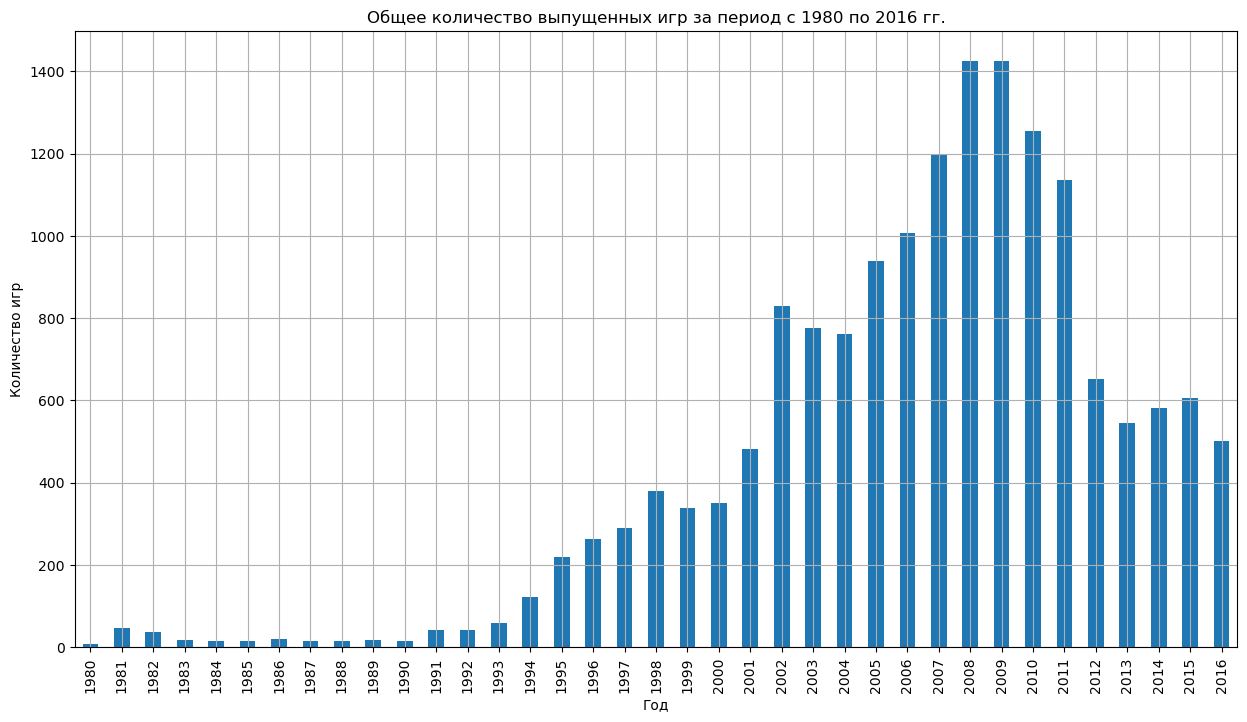

In [22]:
# формируем сводную таблицу по годам релиза с указанием количества выпускаемых игр, строим по таблице столбчатую диаграмму

df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot.bar(figsize=(15,8), legend=False)

plt.grid(True)
plt.title('Общее количество выпущенных игр за период с 1980 по 2016 гг.')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

В таблице представлены данные, охватывающие период с 1980 по 2016 гг. График показывает, что с 1994 года наблюдается постепенное увеличение количества выпускаемых игр. Резкое увеличение наблюдалось в 2002 году, пик пришелся на 2008-2009 гг. После этого наблюдался спад с резким обвалом в 2012 году. Объяснить эти изменения можно рядом причин: прогрессом в области программирования, усовершенствованием аппаратной части, выпуском новых игровых платформ, изменением популярности компьютерных игр как средства проведения досуга, изменением финансирования разработки игр и пр.

По условиям задания нам известно, что данные за 2016 год могут быть неполными. Использование неполных данных для оценки трендов может привести к неправильным выводам, поэтому в дальнейшей работе 2016 из анализа предлагается исключить. Использование слишком старых данных для анализа будущих продаж также не представляется логичным. Проанализируем наиболее популярные игровые платформы, чтобы определить нижнюю временную границу отсечения данных.

### Определение платформ с наибольшими суммарными продажами

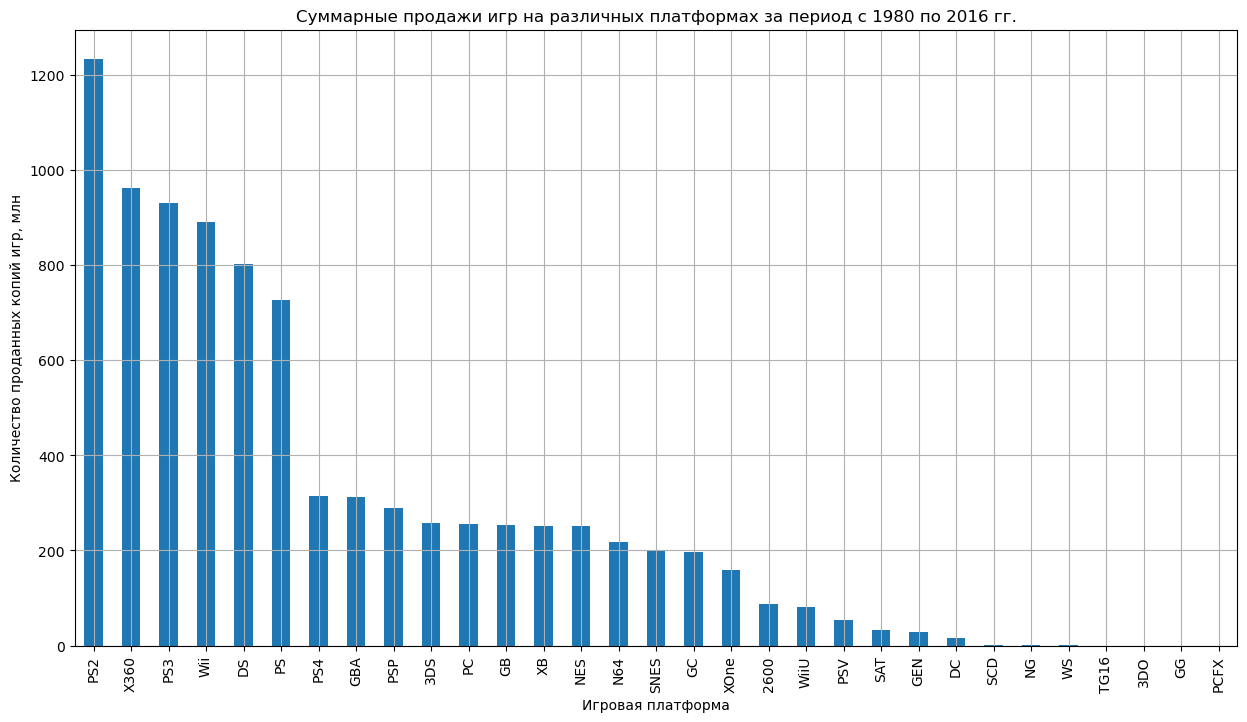

In [23]:
# формируем сводную таблицу с указанием суммарных продаж на различных платформах, строим по таблице столбчатую диаграмму

df.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot.bar(figsize=(15, 8), legend=False)

plt.grid(True)
plt.title('Суммарные продажи игр на различных платформах за период с 1980 по 2016 гг.')
plt.xlabel('Игровая платформа')
plt.ylabel('Количество проданных копий игр, млн')
plt.show()

На графике явно выделяются 6 платформ с наибольшим количеством суммарных продаж:
- PlayStation 2 (PS2)
- Xbox 360 (X360)
- PlayStation 3 (PS3)
- Wii
- Nintendo DS (DS)
- PlayStation (PS)

Выведем сводную таблицу и построим график распределения продаж игр на данных платформах по годам.

In [24]:
# выделим в отдельный датафрейм данные по 6 популярным платформам
popular_platforms = df.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)[0:6]
data_popular = df.query('platform in @popular_platforms.index')

# выведем сводную таблицу по суммарным продажам на 6 популярных платформах по годам
data_popular.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')


platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


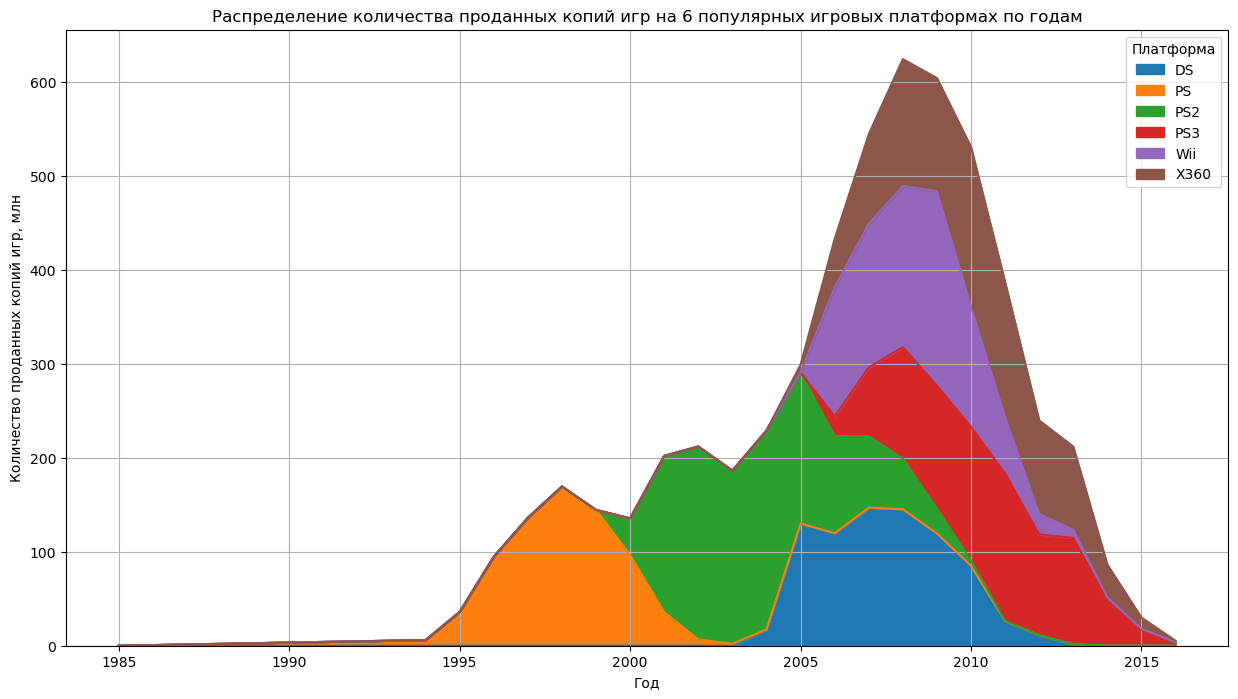

In [25]:
# отобразим график распределения суммарных продаж на 6 популярных платформах по годам

data_popular.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot.area(figsize=(15, 8), grid=True)

plt.title('Распределение количества проданных копий игр на 6 популярных игровых платформах по годам')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий игр, млн')
plt.legend(title='Платформа')
plt.show()

График и таблица показывают, что жизненный цикл игровой платформы от появления по прекращения продаж составляет в общем случае  10-12 лет. 

Также на графике видно, что суммарные продажи игр на самых популярных платформах к 2015 году значительно снизились, а для каких-то платформ и вовсе прекратились. Сфера компьютерных игр меняется очень быстро, поэтому для дальнейшего анализа использовать старые данные нецелесообразно. Лучше использовать данные за последние 2-3 года. Также из анализа предалагется исключить 2016 год, так как нам известно, что данные за него могут быть неполными, что может исказить динамику изменения продаж.

Таким образом, далее мы будет проводить анализ данных за период с 2013 по 2015 гг.

In [26]:
# чтобы сохранить исторические данные, сохраняем срез в отдельный датафрейм
data = df.query('2016 > year_of_release >= 2013')

# пересохраняем таблицу data_popular
data_popular = data.query('platform in @popular_platforms.index')

### Выявление потенциально прибыльных платформ
Для выявления потенциально прибыльных платформ рассмотрим динамику суммарных продаж и количества выпускаемых игр на всех платформах в рассматриваемый период.

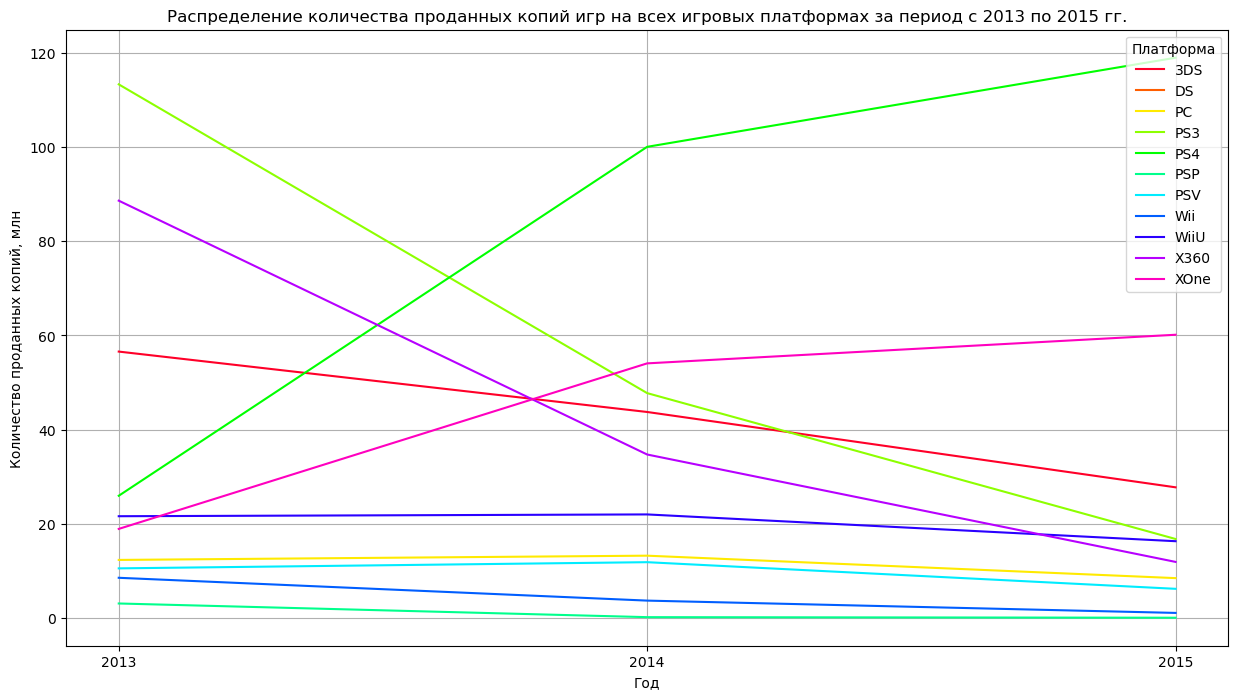

In [27]:
data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 8), grid=True, colormap='gist_rainbow')

plt.title('Распределение количества проданных копий игр на всех игровых платформах за период с 2013 по 2015 гг.')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, млн')
plt.legend(title='Платформа')
plt.xticks([2013, 2014, 2015])
plt.show()

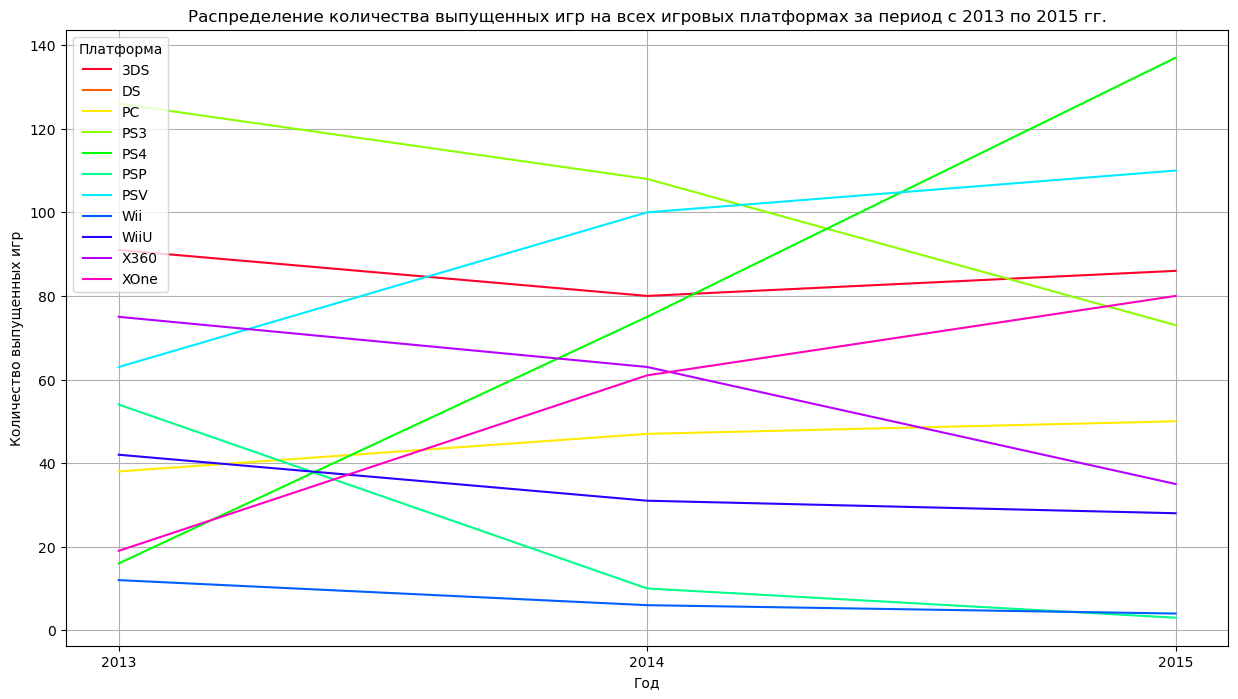

In [28]:
data.pivot_table(index='year_of_release', columns = 'platform', values='name', aggfunc='count').plot(figsize=(15, 8), grid=True, colormap='gist_rainbow')

plt.title('Распределение количества выпущенных игр на всех игровых платформах за период с 2013 по 2015 гг.')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.xticks([2013, 2014, 2015])
plt.legend(title='Платформа')
plt.show()

Первый график показывает, что за период с 2013 по 2015 гг. тенденцию к увеличению суммарного количества проданных копий показывают две платформы: PlayStation 4 и Xbox One. Остальные платформы демонстируют тенденцию к снижению количества продаж.
Эти же две платформы отличаются активным ростом количества выходящих для них игр (что не удивительно, если учесть, что они обе появились в 2013 году).

На фоне снижения суммарных продаж рост количества выпускаемых игр наблюдается на следующих платформах:
- PlayStation Vita (PSV)
- PC
- Nintendo 3DS (за 2015 год по сравнению с 2014; в 2014 году наблюдалось снижение по сравнению с 2013)

Посмотрим также на исторические данные, чтобы узнать, игр для какой платформы было продано больше всего с 1980 по 2016 год.

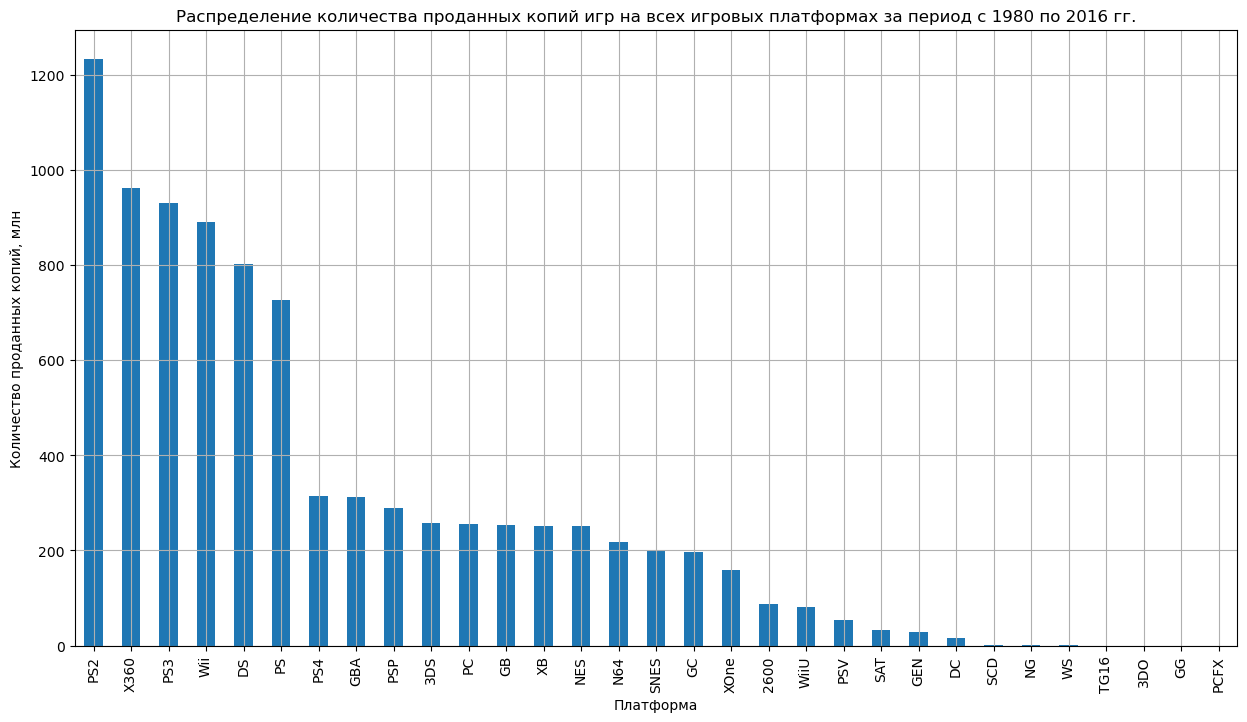

In [29]:
df.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot.bar(figsize=(15, 8), grid=True, legend=False)

plt.title('Распределение количества проданных копий игр на всех игровых платформах за период с 1980 по 2016 гг.')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.show()

Такой популярной платформой была Playstation 2, для которой было продано больше 1,2 млрд копий игр.

### Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам

Построение диаграммы размаха по глобальным продажам по платформам поможет нам увидеть, за счет чего формируются объемы продаж игр.

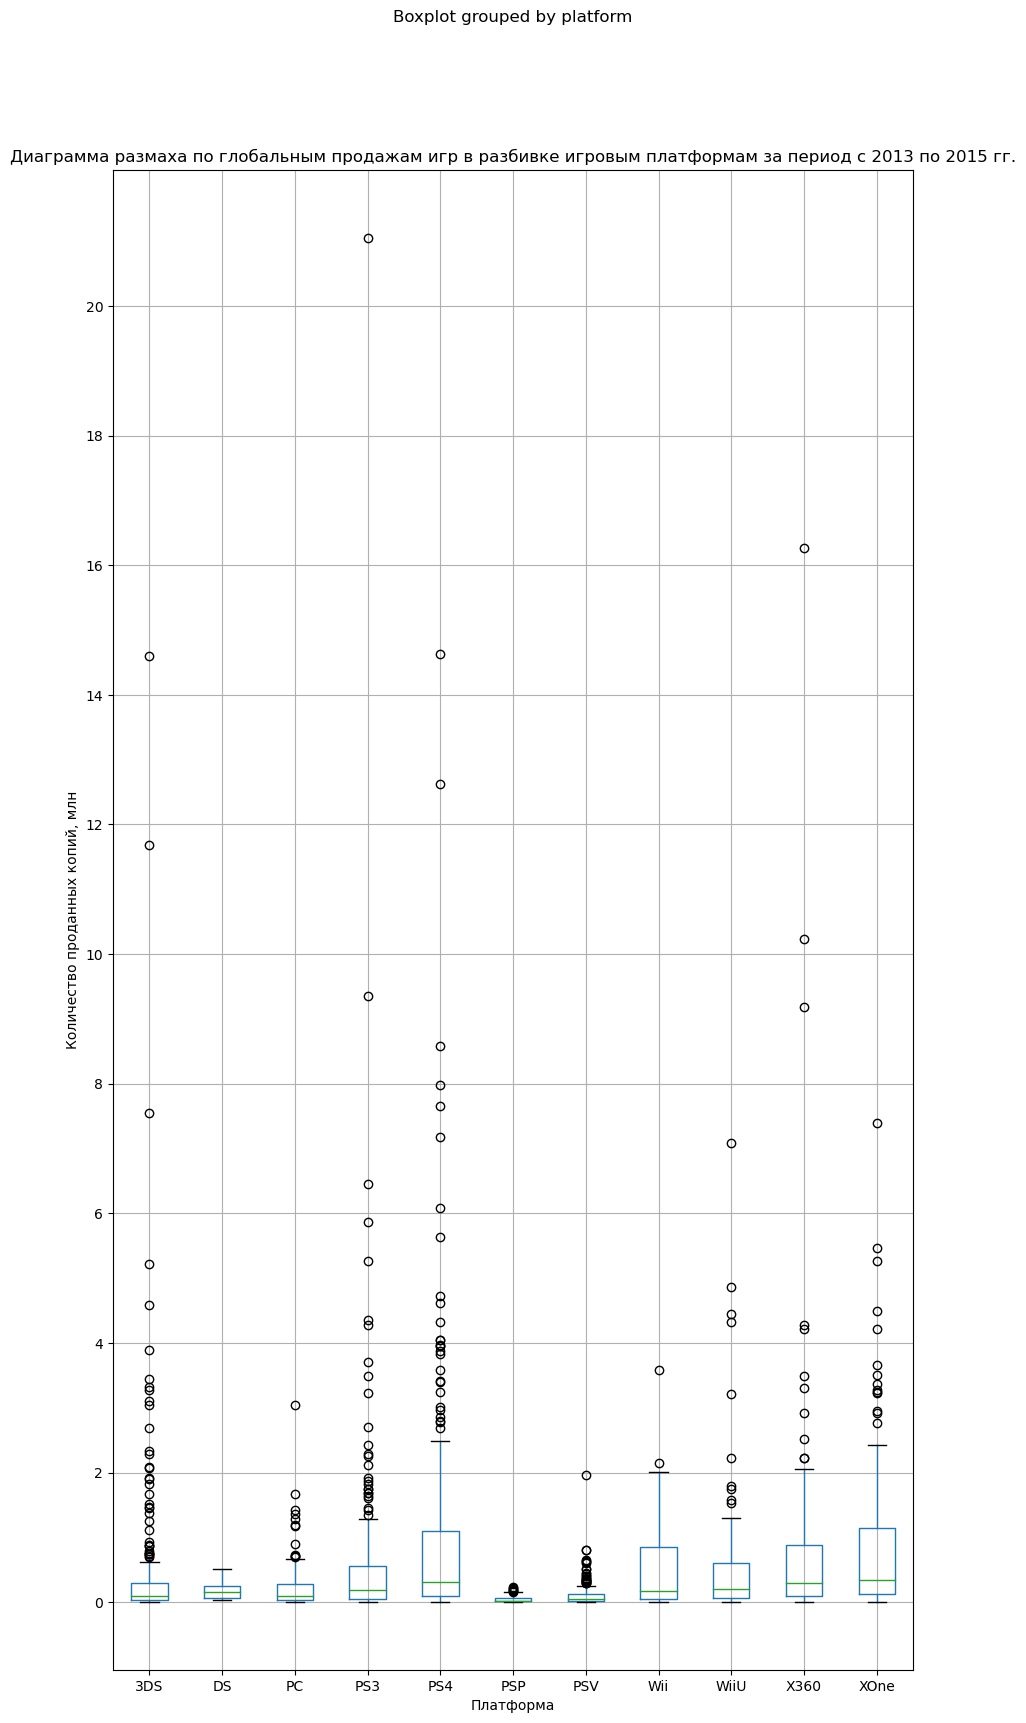

In [30]:
data.boxplot(column='total_sales', by='platform', figsize=(10, 20))

n = range(0, 22, 2)
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке игровым платформам за период с 2013 по 2015 гг.')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.yticks(n)
plt.show()

На всех диаграммах мы видим значительное количество выбросов в большую сторону. Это означает, что популярность игровой платформы в перерасчете на количество проданных копий игр складывается за счет отдельных сверхпопулярных игр.

Посмотрим на игру, копий которой было продано больше всего за период с 2012 по 2015 гг.

In [31]:
data[data['total_sales'] == data['total_sales'].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,has_critic_score,has_user_score,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,True,True,21.05


Самая продаваемая игра за рассматриваемый период - Grand Theft Auto V (PlayStation 3). Продано 21,05 млн копий.

Верхние усы у диаграмм чуть превышают значение 2,5 млн. Построим график еще раз, сделав ограничение по выбросам.

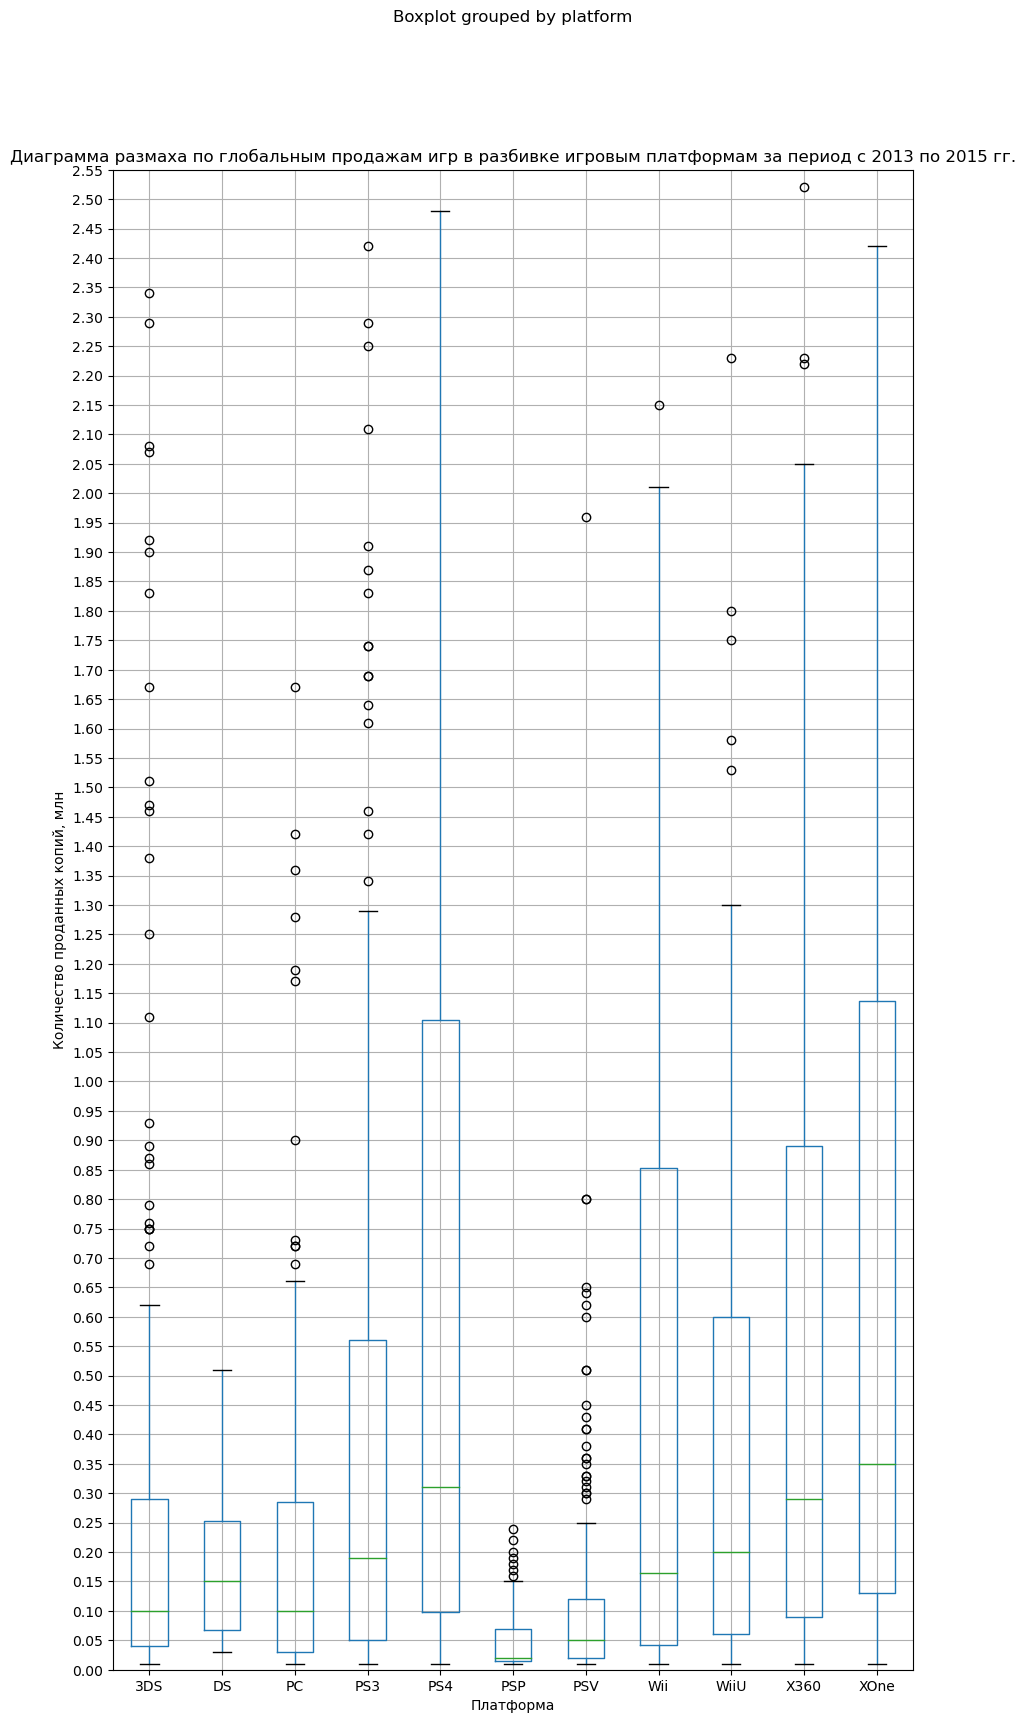

In [32]:
data.boxplot(column='total_sales', by='platform', figsize=(10, 20))

n = np.arange(0, 2.6, 0.05)
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке игровым платформам за период с 2013 по 2015 гг.')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.ylim(0, 2.1)
plt.yticks(n)
plt.show()

Медианное количество проданных копий одной игры варьируется от 20 до 350 тыс. в зависимости от платформы. У платформ, которые в рассматриваемый период демонстируют рост суммарных продаж (PlayStation 4 и Xbox One) также отмечаются и наиболее высокие медианные показатели продаж (310 и 350 тыс. копий соответственно), и показатели 75% квартиля. Также отметим достаточно высокие показатели на платформах Wii и Xbox 360.

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы

Рассмотрим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами на примере платформы Playstation 3.

Коэффициент корреляции между пользовательской оценкой и общими продажами игр на платформе PS3:  -0.01633272834351343
Коэффициент корреляции между оценкой критиков и общими продажами игр на платформе PS3:  0.3342853393371919


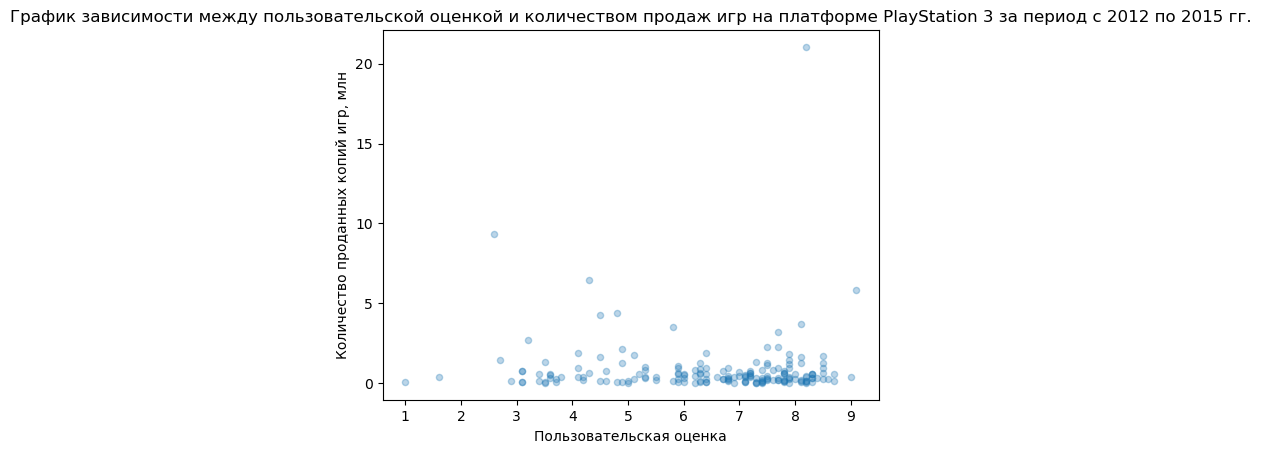

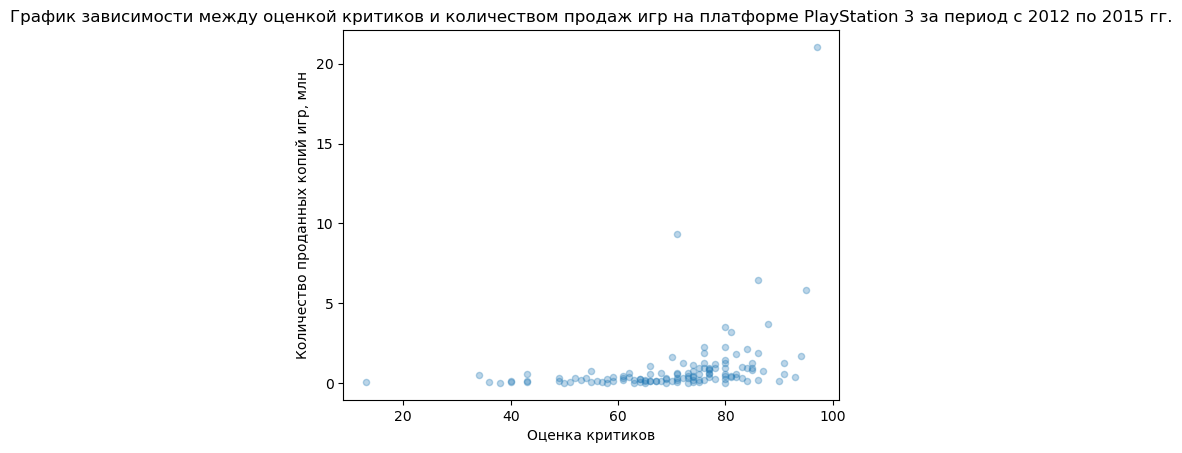

In [33]:
data.query('platform == "PS3" and has_user_score == True').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, title ='График зависимости между пользовательской оценкой и количеством продаж игр на платформе PlayStation 3 за период с 2012 по 2015 гг.', xlabel='Пользовательская оценка', ylabel='Количество проданных копий игр, млн') 
data.query('platform == "PS3" and has_critic_score == True').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, title ='График зависимости между оценкой критиков и количеством продаж игр на платформе PlayStation 3 за период с 2012 по 2015 гг.', xlabel='Оценка критиков', ylabel='Количество проданных копий игр, млн') 

print('Коэффициент корреляции между пользовательской оценкой и общими продажами игр на платформе PS3: ', data.query('platform == "PS3" and has_user_score == True')['total_sales'].corr(data_popular.query('platform == "PS3" and has_user_score == True')['user_score']))
print('Коэффициент корреляции между оценкой критиков и общими продажами игр на платформе PS3: ', data.query('platform == "PS3" and has_critic_score == True')['total_sales'].corr(data_popular.query('platform == "PS3" and has_critic_score == True')['critic_score']))

Мы видим очень маленькую отрицательную корреляцию между оценками пользователей и количеством проданных копий игр. При этом наблюдается небольшая положительная корреляция между между оценками критиков и продажами. Это позволяет предположить, что пользователи при покупке игры значительно сильнее ориентируются на отзывы критиков, чем на отзывы других игроков.

Проверим это предположение на примере других платформ.

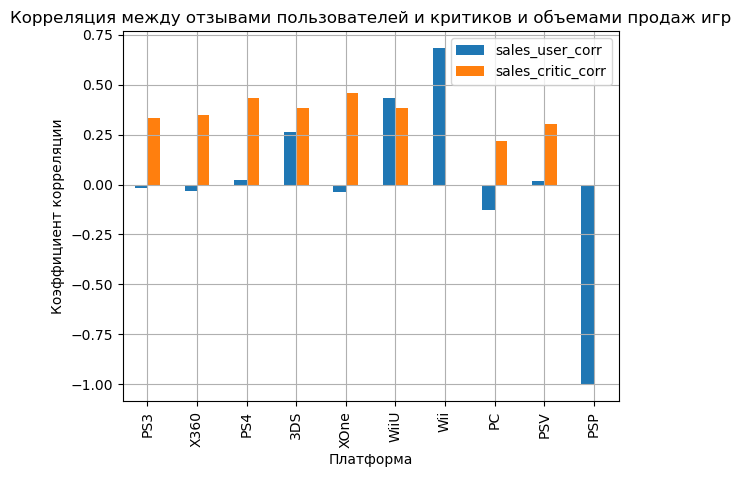

In [34]:
sales_user_corr = []
sales_critic_corr = []

for i in data['platform'].unique():
    sales_user_corr.append(data.query('platform == @i and has_user_score == True')['total_sales'].corr(data.query('platform == @i and has_user_score == True')['user_score']))
    sales_critic_corr.append(data.query('platform == @i and has_critic_score == True')['total_sales'].corr(data.query('platform == @i and has_critic_score == True')['critic_score']))
    
corr_data = {'sales_user_corr': sales_user_corr, 'sales_critic_corr': sales_critic_corr}
corr_df = pd.DataFrame(corr_data, index=data['platform'].unique())

corr_df[corr_df['sales_user_corr'].isna() == False].plot.bar(grid=True)
plt.title('Корреляция между отзывами пользователей и критиков и объемами продаж игр')
plt.xlabel('Платформа')
plt.ylabel('Коэффициент корреляции')
plt.show()

График показывает разные соотношения на различных платформах. 

Платформы Nintendo DS и PSP показывают очень высокую отрицательную корреляцию между отзывами пользователей и суммарными продажами. Аномалия эта объясняется очень малым количеством игр, выпускаемых для этих платформ в период с 2013 по 2015 гг.(для PSP игр вышло меньше 10, а выпуск игр для Nintendo DS прекратился после 2013 года). Также для этих платформ (и платформы Wii) отсутствуют оценки критиков в указанном периоде.

Большинство оставшихся платформ показывают, что коэффициент корреляции между оценками критиков и продажами гораздо выше, чем коэффициент корреляции между пользовательскими оценками и продажами (исключения: платформы Nintendo 3DS и WiiU). Можно представить себе следующий сценарий: пользователь при приобретении игры ориентируется на оценки критиков, а не на отзывы пользователей, но качество игры его затем разочаровывает (что объясняет отрицательную корреляцию в ряде случаев). 

### Распределение игр по жанрам

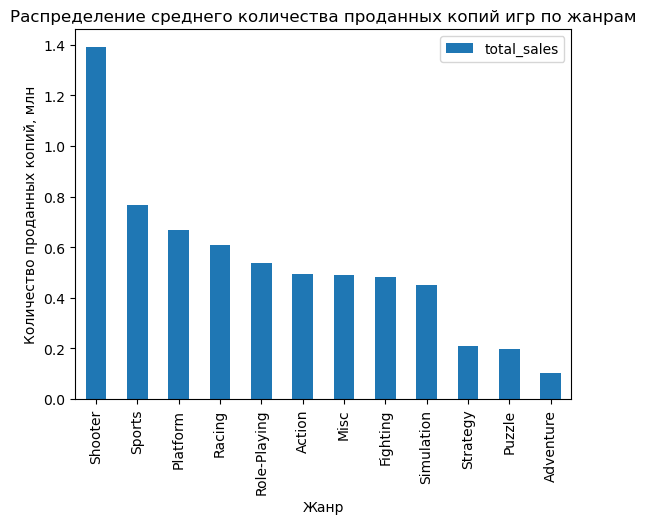

In [35]:
data.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False).plot.bar()

plt.title('Распределение среднего количества проданных копий игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.show()

График распределения количества проданных копий игр в зависимости от жанра показывает, что самыми продаваемыми в среднем являются игры в жанрах Shooter, Sports и Platform. Меньше всего продается игр в жанрах Adventure, Puzzle и Strategy.

Сравним это распределение с распределение количества выпускаемых игр в зависимости от жанра.

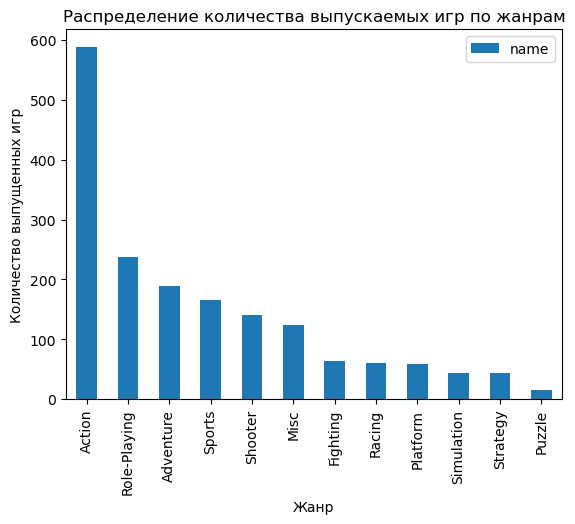

In [36]:
data.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False).plot.bar()

plt.title('Распределение количества выпускаемых игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество выпущенных игр')
plt.show()

Несмотря на то, что игр в жанре Action выпускалось в рассматриваемый период больше всего, у пользователей гораздо большей популярностью пользуются, судя по первому графику, шутеры.

## Составление портрета пользователя в различных регионах

Перед тем, как определить самые популярные платформы и жанры в каждом регионе, определим, какую долю рынка занимает каждый из них.

In [37]:
print(f'Доля продаж в Северной Америке составляет {round((data["na_sales"].sum() / data["total_sales"].sum())*100, 2)}% от суммарных глобальных продаж.')
print(f'Доля продаж в Европе составляет {round((data["eu_sales"].sum() / data["total_sales"].sum())*100, 2)}% от суммарных глобальных продаж.')
print(f'Доля продаж в Японии составляет {round((data["jp_sales"].sum() / data["total_sales"].sum())*100, 2)}% от суммарных глобальных продаж.')

Доля продаж в Северной Америке составляет 40.88% от суммарных глобальных продаж.
Доля продаж в Европе составляет 35.49% от суммарных глобальных продаж.
Доля продаж в Японии составляет 12.64% от суммарных глобальных продаж.


Больше 40% проданных в период с 2013 по 2015 гг. игр на популярных платформах приходилась на долю Северной Америки.

Далее определим топ-5 популярных платформ и жанров игр в каждом регионе, а также посмотрим, игр с каким рейтингом продавалось в каждом регионе больше всего.

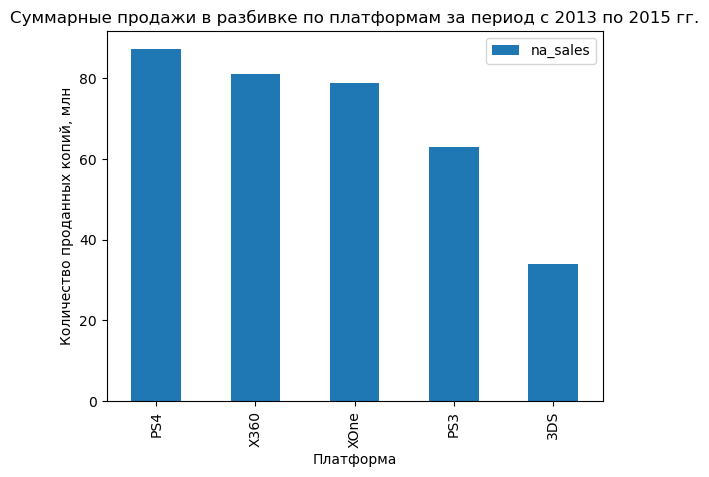

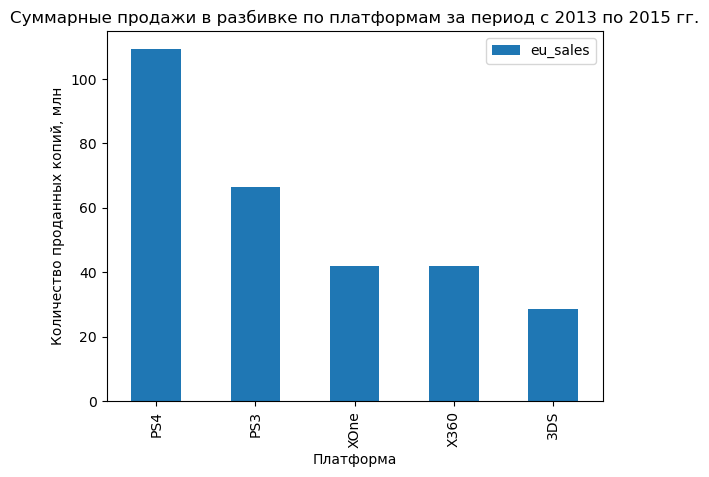

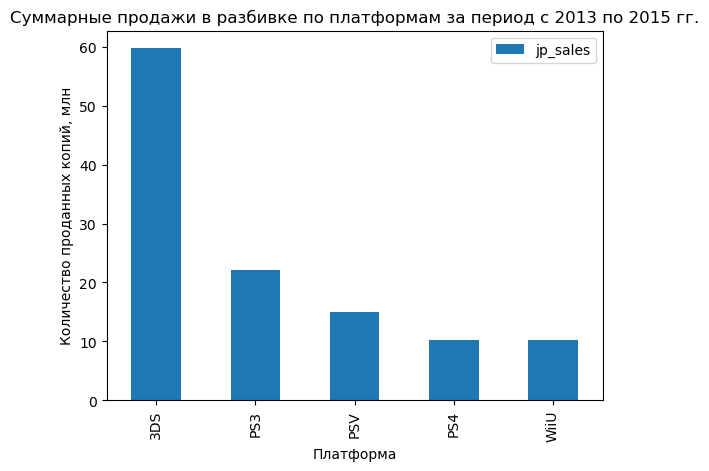

In [38]:
# топ-5 платформ по суммарным продажам в различных регионах

for i in ['na_sales', 'eu_sales', 'jp_sales']:
    data.pivot_table(index='platform', values=i, aggfunc='sum').sort_values(by=i, ascending = False)[0:5].plot.bar(title='Суммарные продажи в разбивке по платформам за период с 2013 по 2015 гг.', xlabel='Платформа', ylabel='Количество проданных копий, млн')

Северная Америка:
- самая популярная игровая платформа - PlayStation 4 (новинка 2013 года)
- на 2 и 3 местах - американские игровые платформы Xbox 360 и Xbox One
- на 4 и 5 местах - PlayStation и Nintendo 3DS

Европа: в целом распределение похоже, но PlayStation 3 обходит по популярности Xbox 360, Xbox One и Nintendo 3DS

Япония: наиболее популярны японские игровые платформы, самая популярная - Nintendo 3DS.

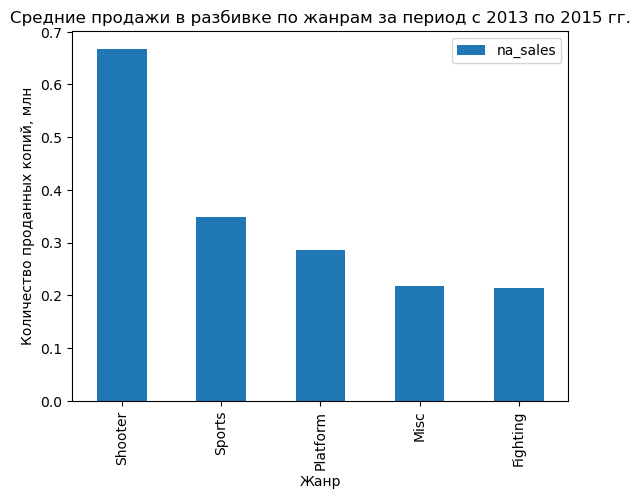

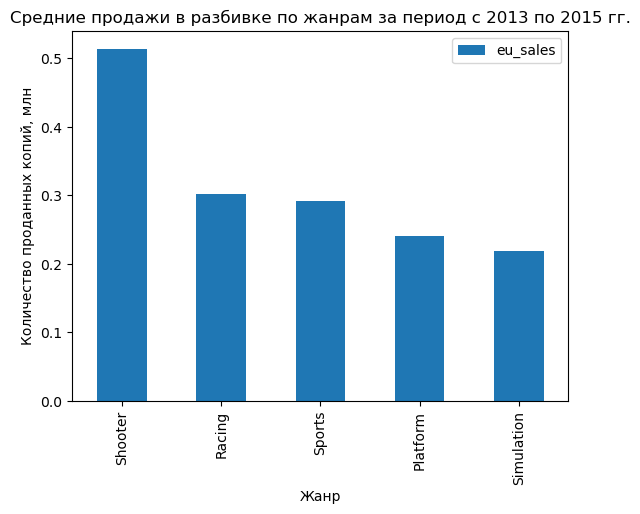

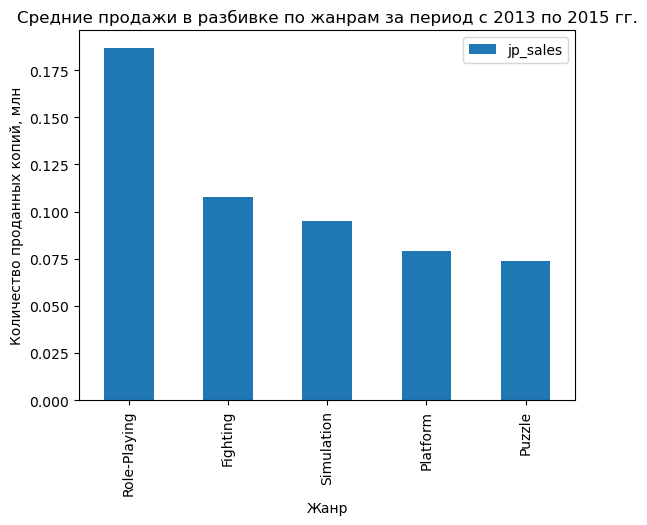

In [39]:
# топ-5 жанров по средним продажам в различных регионах

for i in ['na_sales', 'eu_sales', 'jp_sales']:
    data.pivot_table(index='genre', values=i, aggfunc='mean').sort_values(by=i, ascending = False)[0:5].plot.bar(title='Средние продажи в разбивке по жанрам за период с 2013 по 2015 гг.', xlabel='Жанр', ylabel='Количество проданных копий, млн')


Снова Америка и Европа демонстируют схожесть - в обоих регионах самым популярным жанром являются шутеры. В Японии наиболее популярны игры в жанре Role-Playing.

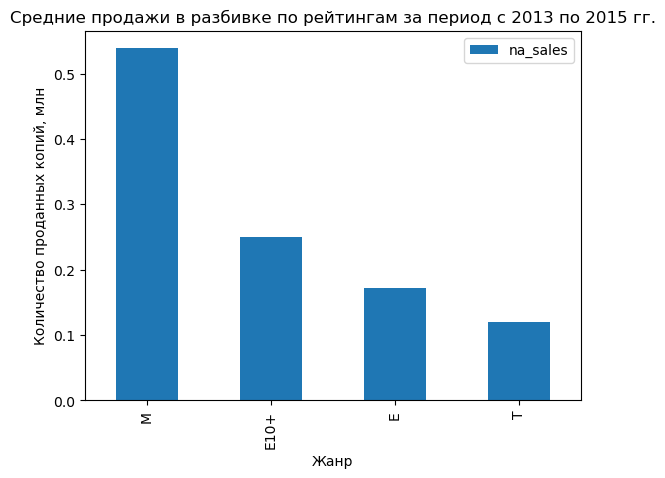

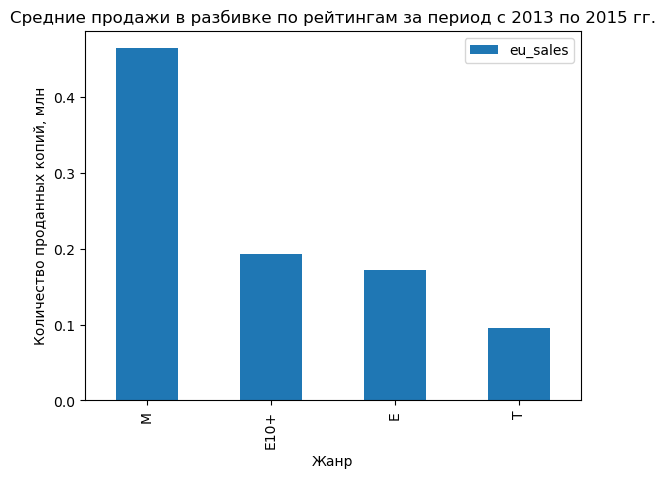

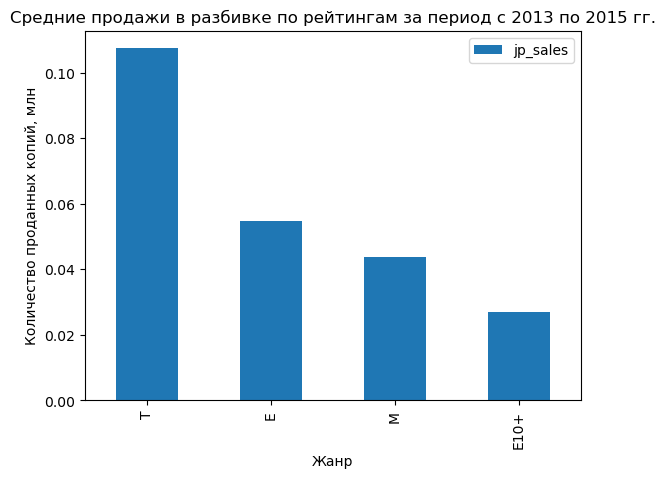

In [40]:
# распределение средних продаж игр в зависимости от рейтингов

for i in ['na_sales', 'eu_sales', 'jp_sales']:
    data.pivot_table(index='rating', values=i, aggfunc='mean').sort_values(by=i, ascending = False)[0:4].plot.bar(title='Средние продажи в разбивке по рейтингам за период с 2013 по 2015 гг.', xlabel='Жанр', ylabel='Количество проданных копий, млн')


В Америке и Европе наибольшие средние продажи наблюдаются у игр с рейтингом М ("Для взрослых"). В Японии наиболее популярны игры с рейтингом T ("Для подростков").

Объяснить различия в долях продаж в разных регионах можно как культурными отличиями, так и географией разработки продаж физических копий игровых приставок.

## Проверка гипотез

### Гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза в данной формулировке является двусторонней (так как нам требуется подтвердить факт равенства или неравенства рейтингов, а не установить, рейтинги какой из платформ выше или ниже). 

In [41]:
alpha = 0.05

results = stats.ttest_ind(data.query('platform == "XOne" and has_user_score == True')['user_score'], data.query('platform == "PC" and has_user_score == True')['user_score'], equal_var=False)

print('Нулевая гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые')
print('Альтернативная гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC не равны')
print()

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.') 

print(results.pvalue)
    
print()
print('Средние пользовательские рейтинги платформы Xbox One: ', round(data.query('platform == "XOne" and has_user_score == True')['user_score'].mean(), 1))
print(f'Средние пользовательские рейтинги платформы PC: ', round(data.query('platform == "PC" and has_user_score == True')['user_score'].mean(), 1))

Нулевая гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
Альтернативная гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC не равны

Не получилось отвергнуть нулевую гипотезу.
0.2867036680187632

Средние пользовательские рейтинги платформы Xbox One:  6.5
Средние пользовательские рейтинги платформы PC:  6.3


Полученное значение p-value выше уровня статистической значимости 5%, следовательно, нулевая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не может быть отвергнута. Расчет средних рейтингов за период с 2013 по 2015 гг. показывает, что средние пользовательские рейтинги этих платформ достаточно близки.

### Гипотеза 2: средние пользовательские рейтинги жанров Action и Sports разные.

Гипотеза также является двусторонней.

In [42]:
alpha = 0.05

results = stats.ttest_ind(data.query('genre == "Action" and has_user_score == True')['user_score'], data.query('genre == "Sports" and has_user_score == True')['user_score'], equal_var=False)

print('Нулевая гипотеза: cредние пользовательские рейтинги жанров Action и Sports одинаковые')
print('Альтернативная гипотеза: cредние пользовательские рейтинги жанров Action и Sports не равны')
print()

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.') 
    
print(results.pvalue)
    
print()
print('Средние пользовательские рейтинги жанра Action: ', round(data.query('genre == "Action" and has_user_score == True')['user_score'].mean(), 1))
print(f'Средние пользовательские рейтинги жанра Sports: ', round(data.query('genre == "Sports" and has_user_score == True')['user_score'].mean(), 1))

Нулевая гипотеза: cредние пользовательские рейтинги жанров Action и Sports одинаковые
Альтернативная гипотеза: cредние пользовательские рейтинги жанров Action и Sports не равны

Отвергаем нулевую гипотезу.
3.5076737062533423e-19

Средние пользовательские рейтинги жанра Action:  6.9
Средние пользовательские рейтинги жанра Sports:  5.2


Полученное значение p-value ниже уровня статистической значимости 5%, следовательно, нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports отвергается. Расчет средних рейтингов за период с 2013 по 2015 гг. это подтверждает.

## Общий вывод

### Введение
Для анализа были предоставлены исторические данные о продажах компьютерных игр за период с 1980 по 2016 гг. Исходные данные представляли собой таблицу из 16715 строк и 11 колонок со следующей информацией:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

Необходимо было изучить данные и проверить ряд гипотез, которые могли бы помочь выделить потенциально прибыльный продукт и спланировать пиар-кампании.

### Предобработка данных
Изучение данных выявило наличие большого количества пропусков. Были выполнены следующие шаги:
- столбец `'name'`: удалены строки с пропусками
- столбец `'year_of_release'`: проведено изучение уникальных названий игр, для которых не указан год релиза. Строки с пропусками в этом столбце удалены. Данные в столбце приведены к типу int.
- столбец `'rating'`: пропуски заполнены наиболее часто встречающимся рейтингом для игр соответствующего жанра. Данные в столбце приведены к типу category.
- столбцы `'critic_score'` и `'user_score'`: пропуски заполнить не удалось. Добавлены столбцы `'has_critic_score'` и `'has_user_score'` с маркером наличия оценки (True/False). Данные в столбце `'user_score'` приведены к типу float.
- столбец `'genre'`: данные приведены к типу category
- добавлен столбец `'total_sales'` с суммой продаж во всех регионах

### Исследовательский анализ данных
#### Изучения количества игр, выпускаемых в разные годы
Выведен график распределения количества выпускаемых игр в разные годы. Выявлено следующее:
- исходные данные содержат информацию за период с 1980 по 2016 гг.
- с 1994 года наблюдается постепенное увеличение количества выпускаемых игр
- резкое увеличение наблюдалось в 2002 году
- пик количества выпускаемых игр пришелся на 2008-2009 гг.
- после 2009 года наблюдался спад с резким обвалом в 2012 году

#### Определение платформ с наибольшими суммарными продажами
Выведен график распределения суммарных продаж по платформам. Платформы с наибольшими продажами:
- PlayStation 2 (PS2)
- Xbox 360 (X360)
- PlayStation 3 (PS3)
- Wii
- Nintendo DS (DS)
- PlayStation (PS)

Анализ распределения суммарных продаж на популярных платформах по годам позволил сделать следующие выводы:
- жизненный цикл большинства популярных платформ от запуска до прекращения продаж составляет 10-12 лет
- в дальнейшем анализе рассматриваются данные за период с 2013 по 2015 гг., так как изменения в сфере компьютерных игр происходят достаточно быстро, поэтому изучение слишком старых данных может привести к неправильным выводам. 2016 год решено исключить из анализа потому, что данные за него представлены не полные, что также может исказить выводы.

#### Выявление потенциально прибыльных платформ
Выведен график распределения суммарных продаж на всех платформах за период с 2013 по 2015 гг. Установлено следующее: 
- по состоянию на 2015 год игры выходили на 10 платформах
- тенденцию к увеличению количества проданных копий на глобальном рынке показывают две платформы, появившиеся самыми последними в 2013 году: PlayStation 4 и Xbox One
- другие платформы демонстрируют тенденцию к снижению количества продаж

#### Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам
Диаграмма показала наличие значительного количество выбросов в большую сторону, что означает следующее: популярность игровой платформы в перерасчете на количество проданных копий игр складывается за счет отдельных сверхпопулярных игр. Игра с максимальным количеством суммарных продаж за рассматриваемый период: Grand Theft Auto V (PlayStation 3).

После отсечения выбросов установлено, что медианное количество проданных копий одной игры варьируется от 20 до 350 тыс. в зависимости от платформы. У платформ, которые в рассматриваемый период демонстируют рост суммарных продаж (PlayStation 4 и Xbox One) также отмечаются и наиболее высокие медианные показатели продаж (310 и 350 тыс. копий соответственно), и показатели 75% квартиля. Также отметим достаточно высокие показатели на платформах Wii и Xbox 360.

#### Влияние отзывов пользователей и критиков на продажи
Изучение графиков рассеяния и коэффициентов корреляции позволило сделать следующий вывод: при покупке игры пользователи скорее ориентируются на отзывы критиков, чем на оценки других пользователей.

#### Распределение игр по жанрам
Выведен график распределения суммарного количества проданных копий игр в зависимости от жанра. Установлено, что самыми продаваемыми являются игр в жанрах Shooter, Sports и Platform. Меньше всего продается игр в жанрах Adventure, Puzzle и Strategy.

### Составление портрета пользователя в разных регионах
Рассчитаны доли рынков относительно глобального:
- Северная Америка: 40,88%
- Европа:  35,49%
- Япония: 12,64%

#### Северная Америка
5 наиболее популярных игровых платформ в Северной Америке в период с 2013 по 2015 гг. (по убыванию):
- PlayStation 4 
- Xbox 360
- Xbox One
- PlayStation 3
- Nintendo 3DS

5 наиболее популярных жанров (по убыванию):
- Shooter
- Sports
- Platform
- Иные жанры
- Fighting

Наиболее часто продаваемые игры имели рейтинг M ("Для взрослых").

#### Европа
5 наиболее популярных игровых платформ в Европе в период с 2013 по 2015 гг. (по убыванию):
- PlayStation 4
- PlayStation 3
- Xbox One
- Xbox 360
- Nintendo 3DS

5 наиболее популярных жанров (по убыванию):
- Shooter
- Racing
- Sports
- Platform
- Simulation

Наиболее часто продаваемые игры имели рейтинг M ("Для взрослых").

#### Япония
5 наиболее популярных игровых платформ в Японии в период с 2013 по 2015 гг. (по убыванию):
- Nintendo 3DS
- PlayStation 3
- PlayStation Vita
- PlayStation 4
- WiiU

5 наиболее популярных жанров (по убыванию):
- Role-Playing
- Fighting
- Simulation
- Platform
- Puzzle

Наиболее часто продаваемые игры имели рейтинг T ("Подросткам").

### Проверка гипотез
#### Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC
С помощью t-теста была проверена двусторонняя гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC. По результатам теста нулевая гипотеза о равенстве рейтингов не была отвергнута. По расчетам средние рейтинги платформ составляют:
- Xbox One: 6,5
- PC: 6,3

#### Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports
С помощью t-теста была проверена двусторонняя гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports. По результатам теста нулевая гипотеза о равенстве рейтингов была отвергнута. По расчетам средние рейтинги жанров составляют:
- Action: 6,9
- Sports: 5,2

### Итого
По результатам исследований можно предположить, что наибольшую прибыль будут приносить игры в жанрах Shooter и Action, продаваемые для платформ Playstation 4 и Xbox One. Также результаты исследования можно учитывать при разработке маркетинговых кампаний.